Final report for this project is available on [github](https://github.com/smd519/data-analytics-portfolio/blob/main/Handwritten_Digit_Classification/Handwritten_Digit_Classification_Report.pdf). Here, we just present the code.

# 1	INTRODUCTION

The idea is to implement a classification learner to classify the handwritten dig-its.  This learner can be part of an online order processing systems in  healthcare, insurance, banking, postal service or even library. The system ac-cepts a scanned image of a prescription, repot, cheque, address, etc.(Anil C.,2022). Then, the image processing techniques are applied to adjust the con-trast, sharpness, and brightness. Next, feature extraction is performed to identi-fy the key information and generate the vector representation of the characters. These vectors are fed to a classification learner to identify the contents. The va-riety comes from different handwriting styles, and poor light conditions while scanning the documents. 
In this article, we focus on a small subset of this problem: handwritten digit classification.

**Problem Statement**: The objective of our analysis is to classify the handwritten digits between 2 and 7.

**Data Set**: The dataset provided includes normalized handwritten digits, scanned from envelopes by the U.S. Postal Service. Pre-processing and feature extraction techniques are already applied on the original scanned images with different sizes and orientations (Le Cun et al., 1990). Each image is represented by a label-id 0-9 (V1), and a vector of 256 grayscale values (V2-V257). The de-tailed description can be found from [Stanford’s website](http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/zip.info.txt). We filter the rows with V1 equal to either 2 or 7 and save it to ziptrain27, and ziptest27 for further in-vestigation. 


# 2. EXPLORATORY DATA ANALYSIS


We start our analysis by perfuming initial investigations on data to understand the features better and to discover any patterns or anomalies in the data set. We use summary statistics and visual representations to investigate the varia-tion of features.

**Size of dataset**: Training data includes 1376 images each containing 256 fea-tures. 731 images are labeled as 2, 645 images are labeled as 7. Test data in-cludes 345 images. 198 images are labeled as 2, 147 images are labeled as 7. Target value distribution between training and test data is maintained.

**Variable descriptions**: Each scanned image is normalized to a 16 x 16 gray-scale images. Each image is represented by vector of 256(= 16 x 16) grayscale values.

**Range**: All the 256 features are in [-1, +1]. There is no need for standardization.

**Correlation**: Next, we investigate the correlation between each pair of features.  If there is a strong correlation between two features, we keep only one. In other words, we reduce the complexity of the model by dimensionality reduction

We can observe strong correlation between adjutant features. We are working with image data, and many adjacent pixels have same grayscale value for the same digit. We remove highly correlated features (cutoff = 0.7) and end up with only 75 features. Figure 3 illustrate which parts of a 16 x 16 image are not correlated and would be used to classify between 2 and 7.

**Outliers**: Next, we investigate the outliers using boxplot, but decided not to remove the outliers and just work with the data set as it is. Because of the vari-ety in handwriting style, digits may be skew towards right, left, top or bottom. In other words, for some features we may have rare values- but it is still ex-pected.

**Variation**: Next, we explore the variation of each predictor for different re-sponse. The goal is to develop an intuitive understanding about the data. From figure 4, we can anticipate that V17, V113, V129 would be more useful than V7 while distinguishing between 2 and 7.  


# 3. METHODOLOGY

In this section, we discuss the classification algorithms. We create linear regres-sion, logistic regression, and KNN classifier. We understand that linear regres-sion is not the right method for binary classification. We simply perform linear regression just because it is asked in the homework questions. Because the line-ar regression output continues numbers out of desired range, we use a trans-former  function 2 + 5*(Linear. Regression >= 4.5) to generate the binomial output.


First, we trained linear regression, logistic regression, and KNN classifier using all the training data and calculated the error rate for training data(ziptrain27), and test data(ziptest27). Error rate refers to misclassification rate from the con-fusion matrix.

For linear regression, we should not refer to the R^2 as a measure of quality, because R^2 from lm is calculated before applying the binomial-transformation.

**Overfitting**: Figure 5 illustrate the overfitting for KNN. When K is reduced from 3 to 1, the training error rate decreases but the testing error increases.  This is because the model overfit to the training data and captured noise.


Based on Table 2, and Figure 5, and without performing any cross-validation, we can say Logistic Regression performs better on training set, and KNN with K=3 performs better overall. 


**Cross-Validation**: We utilize k-fold cross validation with k=5. Our approach is a bit different from what is suggested in homework questions: a) We divide the training dataset(ziptrain27) into 5 subsets. b) At each step, we train all the 3 models on all subsets but one. c) Then, we calculate the misclassification rate for all 3 models using the remaining subset. d) We use mean/variances of the testing errors to compare these models and pick the best one. e) Finally, we re-port the performance of our chosen model by testing it on test data set (ziptest27). 

At each step of the cross-validation, we calculate the error rate for linear re-gression, logistic regression with different probability cutoff values, and KNN with different K values. Results are listed in table 3. We can see that KNN with K=5 has the lowest average misclassification error, and standard deviation. K=3 also has a low average and standard deviation error rate. 

Based on Table 2, we pick the KNN with K=5 as the best model. Next, we build a KNN classifier using the complete training set (ziptrain27), and we report the estimated performance based on model prediction on test set(ziptest27): 2.03%

# 4	SUMMARY AND CONCLUSION

We analyzed the behavior and performance of 3 classification learners. We learned that small K may cause overfitting in KNN algorithm. We also learned that comparison of different algorithm with or without cross-validation may lead to different decision. It is always better to utilize cross validation when comparing different algorithm.

It was a surprise that the logistic regression with optimized cutoff value under-performed the linear regression. Our first assumption was that linear regression shall not be used for binomial classification, but the results are quite impressive.
And finally, we find out that KNN with K=5  is the best model to classify the handwritten digits between 2 and 7 . We report the estimated performance based on model prediction on ziptest27 as misclassification rate = 2.03%. 


# 5	REFERENCES

1.	Lecun, Y., Boser, B., Denker, J. S., Henderson, D., Howard, R. E., Hubbard, W., & Jackel, L. D. (1990). Handwritten digit recognition with a back-propagation network. In D. Touretzky (Ed.), Advances in Neural Infor-mation Processing Systems (NIPS 1989), Denver, CO (Vol. 2). Morgan Kaufmann.
2.	Anil C.(2022). How to easily do Handwriting Recognition using Machine Learning. Nanonets


# 6	APPENDIX

In this section, we present the code.

# 6-1. Load and display the data set

We load the data and explore the summary stats.

In [27]:
ziptrain <- read.table(file="zip.train.csv", sep = ",");
ziptrain27 <- subset(ziptrain, ziptrain[,1]==2 | ziptrain[,1]==7);

ziptest <- read.table(file="zip.test.csv", sep = ",");
ziptest27 <- subset(ziptest, ziptest[,1]==2 | ziptest[,1]==7);

## See sample data

To see the letter picture of the 5-th row by changing the row observation to a matrix

Warning message in 2:90:10:
"numerical expression has 89 elements: only the first used"


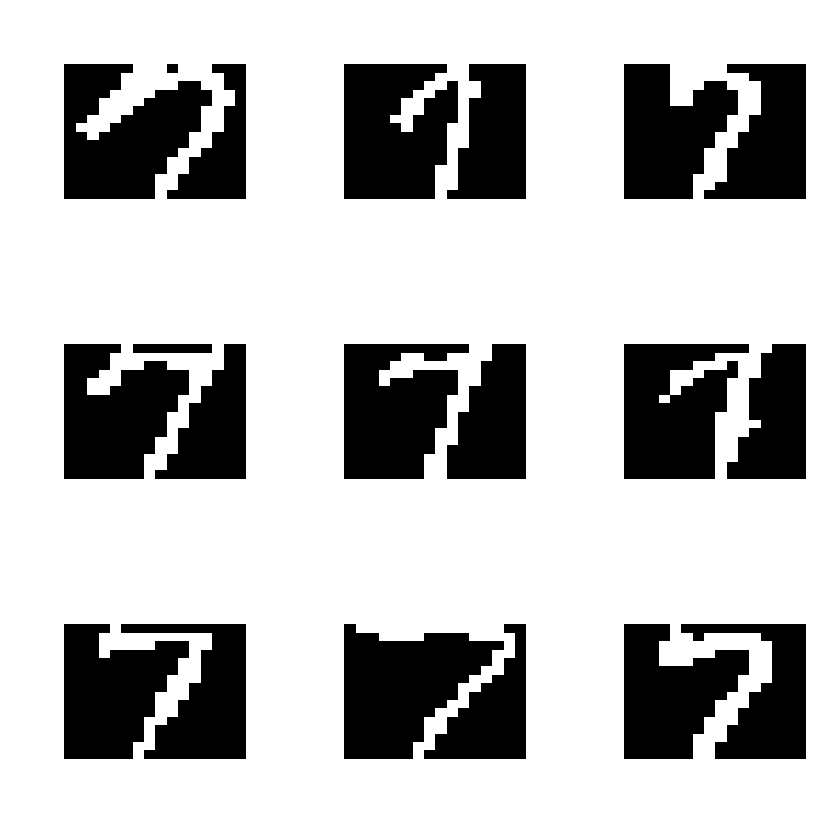

In [2]:
par(mfrow=c(3,3))
for (i in 2:90:10){
  rowindex = i
  ziptrain27[rowindex,1];
  Xval = t(matrix(data.matrix(ziptrain27[,-1])[rowindex,],byrow=TRUE,16,16)[16:1,]);
  image(Xval,col=gray(0:1),axes=FALSE) ## Also try "col=gray(0:32/32)"
}

dim(ziptrain27)

# 6-2. Exploratory Data Analysis of Training data

First I searched about the feature list:

## Size of data sets

In [21]:
dim(ziptrain27)

[1] 1376  257

## Summery Stats

V1,2,7.000
V2,-1,0.412
V3,-1,1.000
V4,-1,1.000
V5,-1,1.000
V6,-1,1.000
V7,-1,1.000
V8,-1,1.000
V9,-1,1.000
V10,-1,1.000
V11,-1,1.000


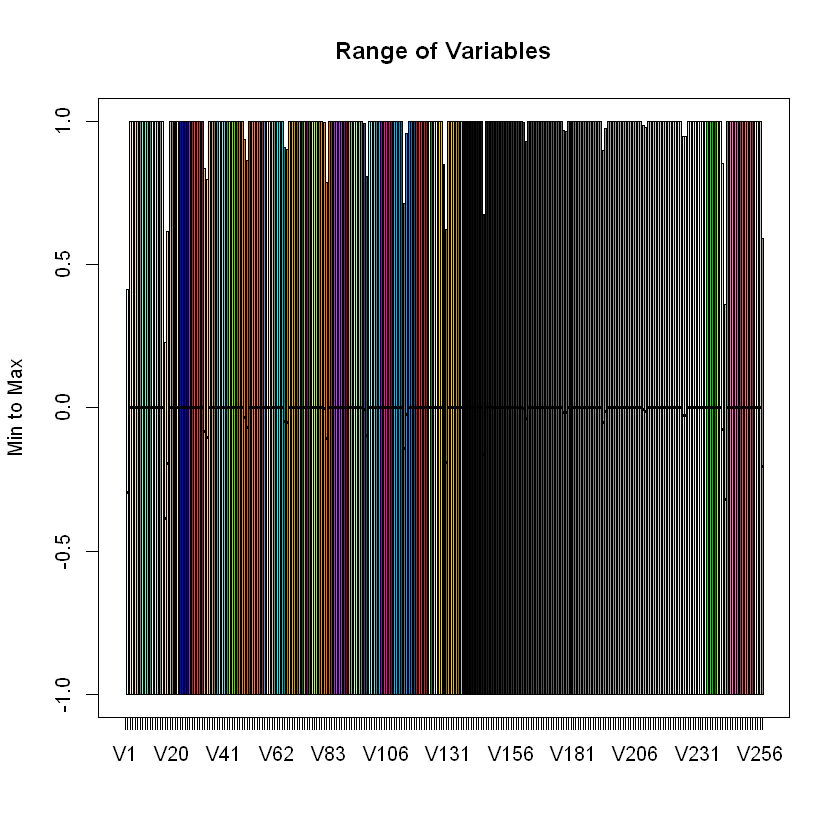

In [23]:
# range for each variable
t(sapply(ziptrain27, range))
boxplot(sapply(ziptrain27, range), col=colors(256), ylim =c(-1,1), main = "Range of Variables", ylab= "Min to Max" )

str(ziptrain27)

## Distribution of response values

[1] 0.53125

[1] 0.46875

[1] 0.573913

[1] 0.426087

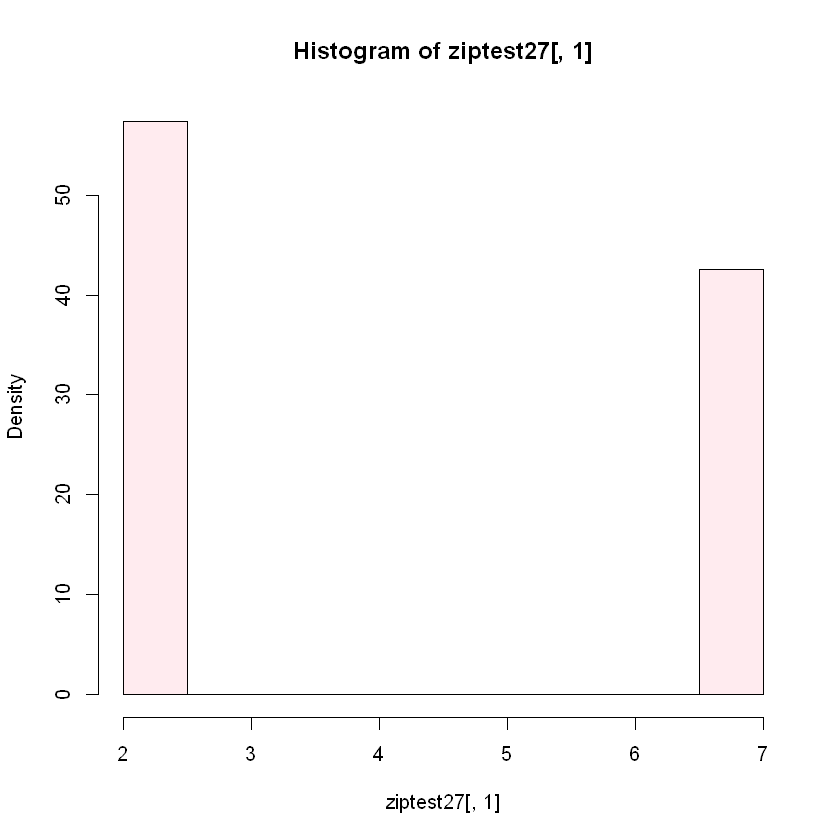

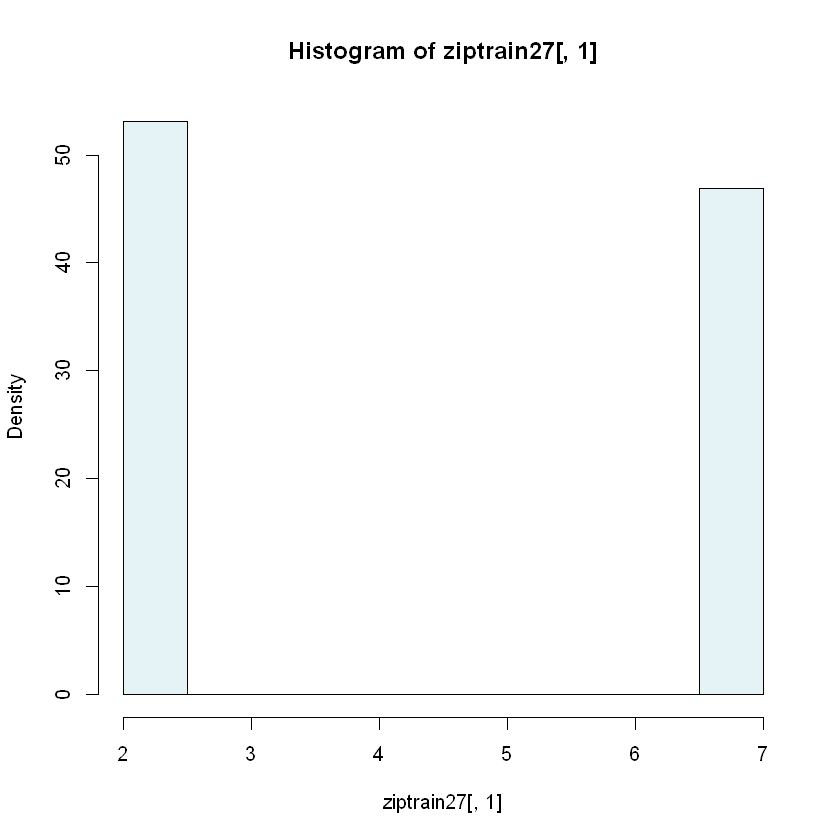

In [3]:
sum(ziptrain27[,1] == 2)/nrow(ziptrain27);
sum(ziptrain27[,1] == 7)/nrow(ziptrain27);

sum(ziptest27[,1] == 2)/nrow(ziptest27);
sum(ziptest27[,1] == 7)/nrow(ziptest27);


histtrain <- hist(ziptrain27[,1], plot = FALSE)
histtest <- hist(ziptest27[,1], plot = FALSE)

histtrain$density <- histtrain$counts/sum(histtrain$counts) * 100
histtest$density <- histtest$counts/sum(histtest$counts) * 100

c1 <- rgb(173,216,230,max = 255, alpha = 80, names = "lt.blue")
c2 <- rgb(255,192,203, max = 255, alpha = 80, names = "lt.pink")
plot(histtest, col = c2,freq = FALSE)
plot(histtrain, col = c1, pch=4 , freq = FALSE)

## Correlation between each pair of predictors

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\WZNQMP\AppData\Local\Temp\Rtmp0KbzTg\downloaded_packages


corrplot 0.92 loaded



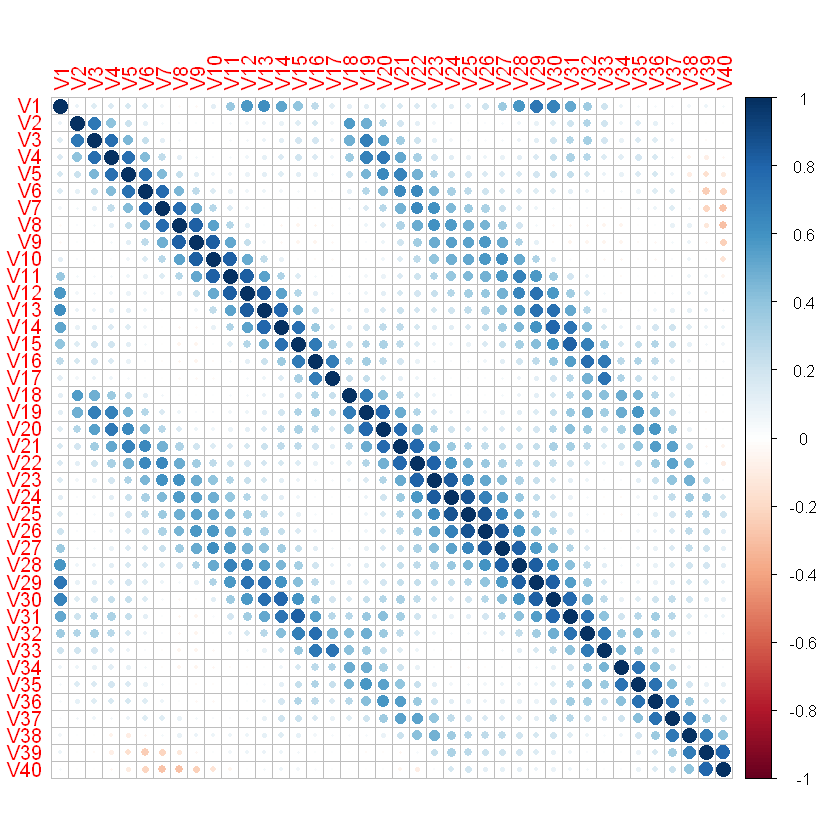

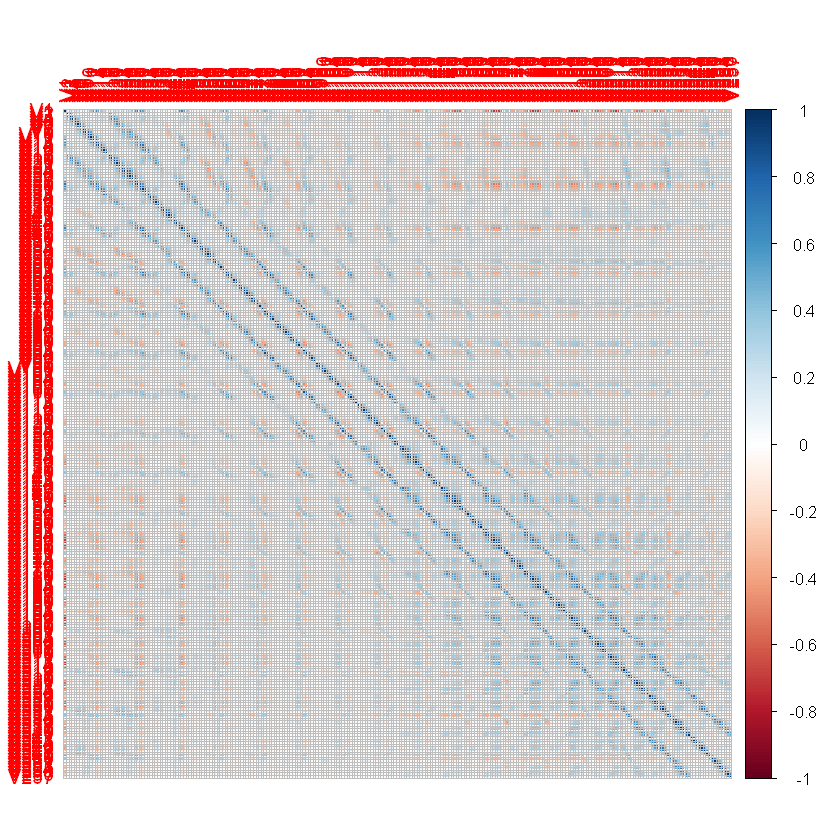

In [6]:
library(corrplot)
corrplot(cor(ziptrain27[,1:40]))
corrplot(cor(ziptrain27))

## Remove highly correlated features

In [7]:
library('caret')
corr <- round(cor(ziptrain27[,-1]),2);
hc = findCorrelation(corr, cutoff=0.7) # putt any value as a "cutoff" 
hc = sort(hc)
reduced_Data = ziptrain27[,-c(hc+1)]
dim(reduced_Data)

Loading required package: ggplot2

Loading required package: lattice



[1] 1376   76

Here is the final list of features:

In [8]:
colnames(reduced_Data)

[1] "V1"   "V2"   "V7"   "V15"  "V17"  "V18"  "V34"  "V38"  "V40"  "V44" 
[11] "V50"  "V54"  "V59"  "V60"  "V61"  "V66"  "V68"  "V69"  "V82"  "V84" 
[21] "V86"  "V88"  "V89"  "V92"  "V98"  "V100" "V101" "V102" "V103" "V104"
[31] "V113" "V114" "V123" "V127" "V129" "V130" "V145" "V153" "V154" "V161"
[41] "V169" "V170" "V171" "V172" "V173" "V177" "V178" "V185" "V186" "V187"
[51] "V188" "V193" "V194" "V200" "V201" "V202" "V203" "V204" "V209" "V210"
[61] "V216" "V217" "V218" "V219" "V220" "V225" "V233" "V241" "V242" "V247"
[71] "V248" "V250" "V251" "V252" "V256" "V257"

We can observe strong correlation between adjutant features. We are working with image data, and many adjacent pixels have same grayscale value for the same digit. We remove highly correlated features (cutoff = 0.7) and end up with only 75 features. Figure 3 illustrate which parts of a 16 x 16 image are not correlated and would be used to classify between 2 and 7.

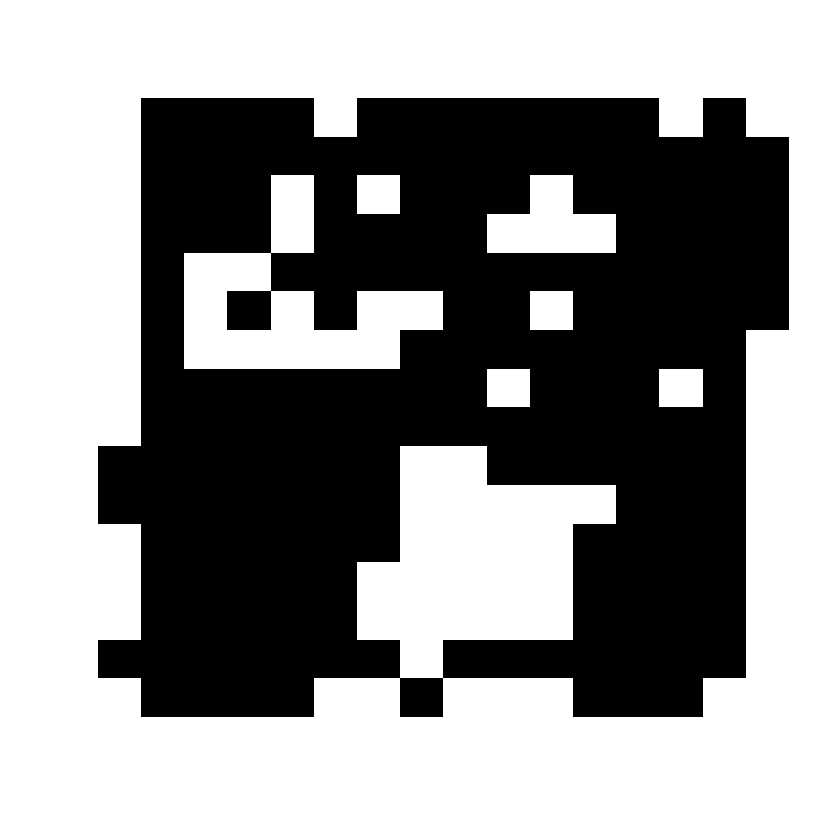

In [9]:
zoom = rep(1,256)
zoom[c(hc)] = 0
Xval = t(matrix(data.matrix(zoom),byrow=TRUE,16,16)[16:1,]);
image(Xval,col=gray(0:1),axes=FALSE) ## Also try "col=gray(0:32/32)"

## Outliers

Now, we investigate the outliers using boxplot.

Ideally, We need to talk to a subject matter expert to decide if the outliers are presenting specific event or circumstance or it is a mistake in data gathering. But here we just assume all data are good for analysis and we do not remove any data from our data set.

No id variables; using all as measure variables



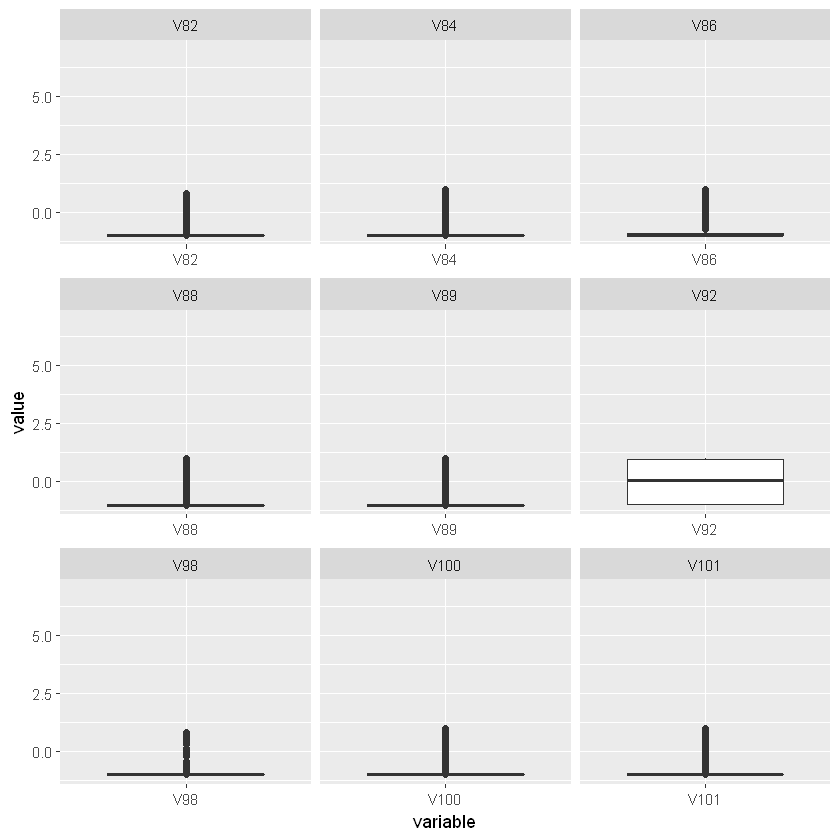

In [10]:
library("reshape2")
library("ggplot2") 
library("ggforce")
data_long <- melt(reduced_Data)                                      # Reshaping data frame

ggplot(data_long, aes(x = variable, y = value)) + 
  geom_boxplot(na.rm = TRUE) +
  facet_wrap_paginate(~variable, scales = "free_x", nrow=3, ncol=3, page = 3)

## Explore relationship between each predictors and response

Here, I am **not** looking for mathematics definition of correlation. I just want to understand the data better.


+ V17, V130 might be very useful in distinguishing the target values. For example, you can see that for target value of 2, V17 is around -1.

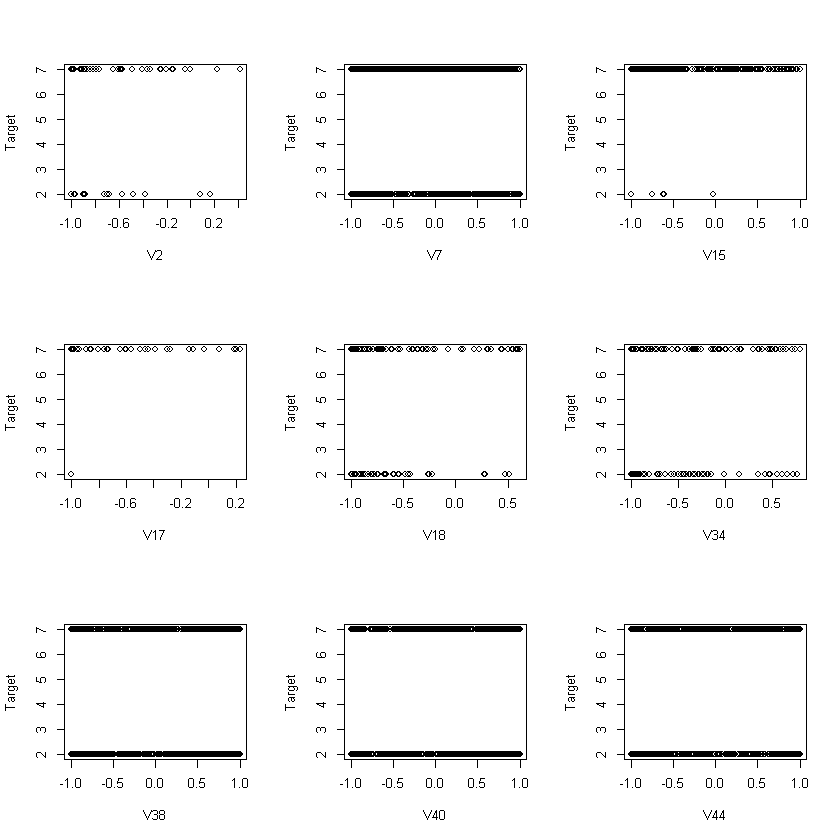

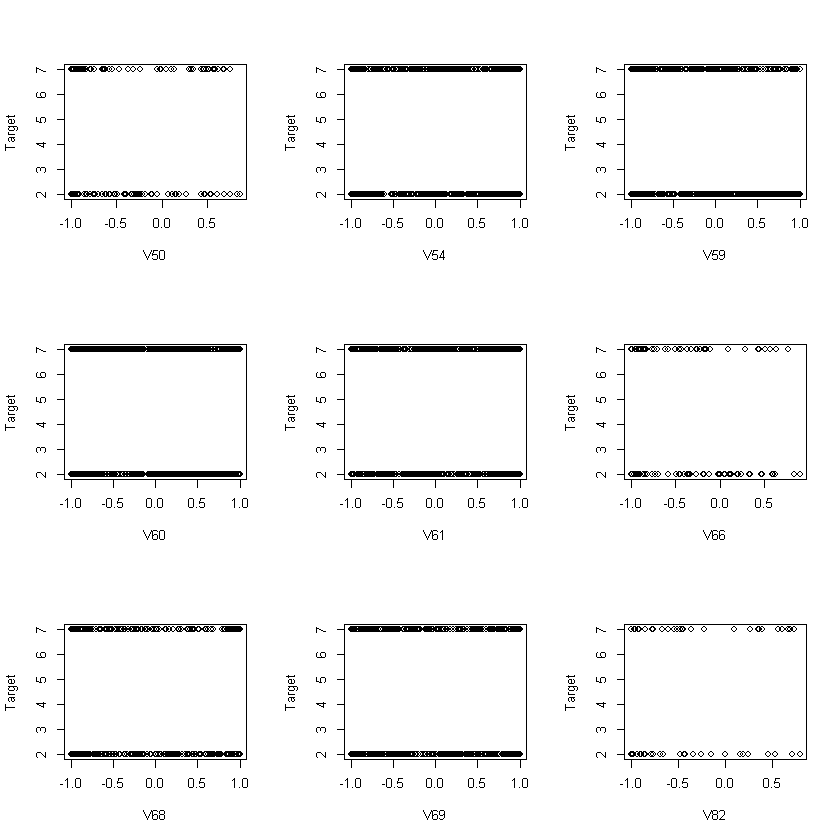

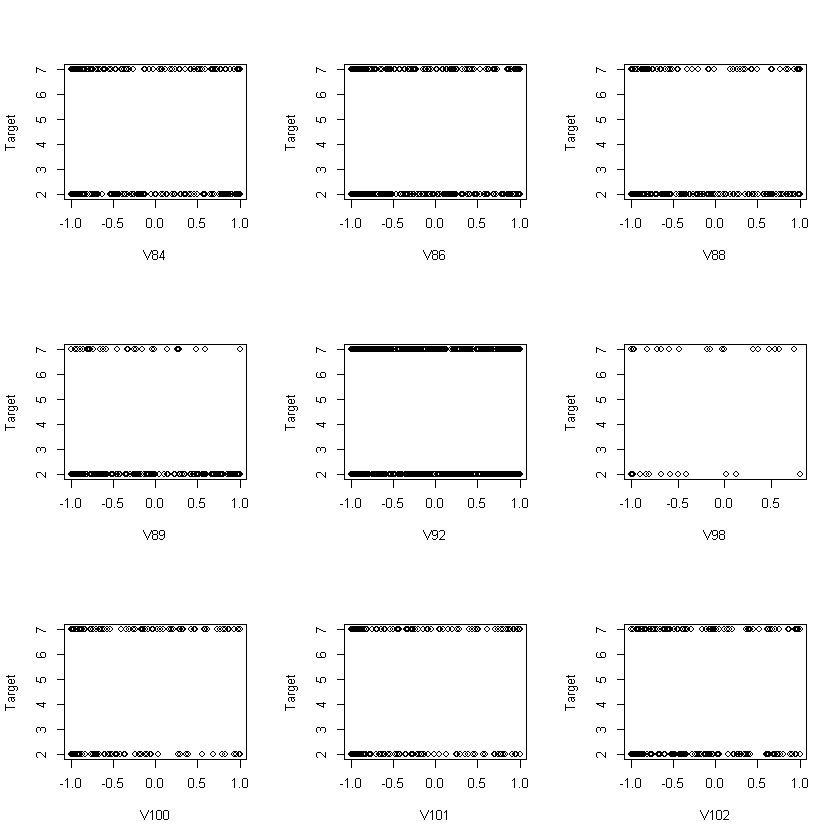

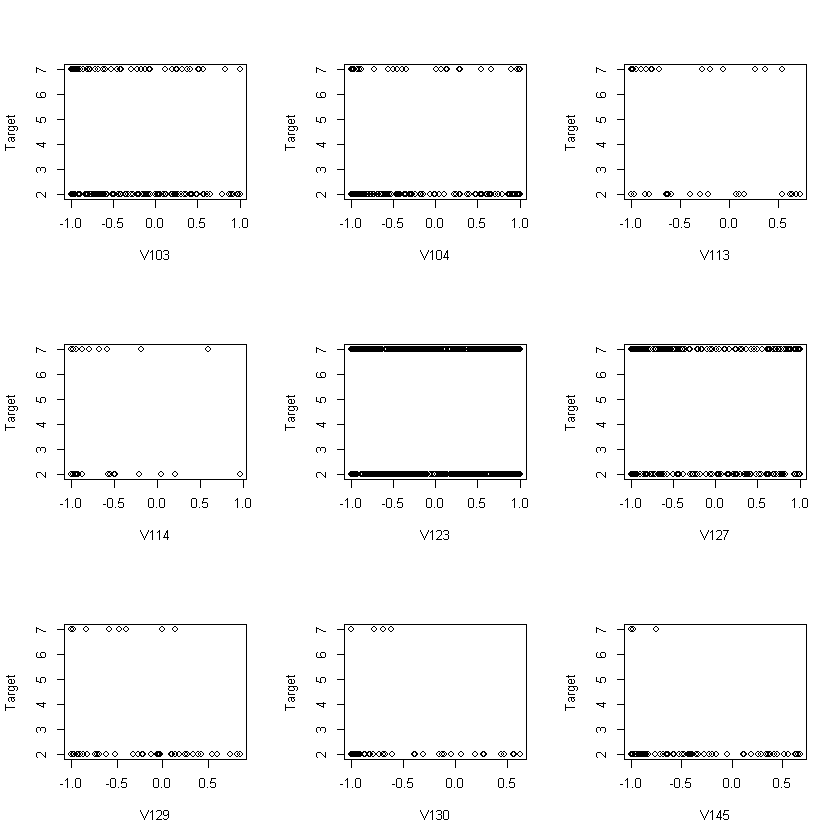

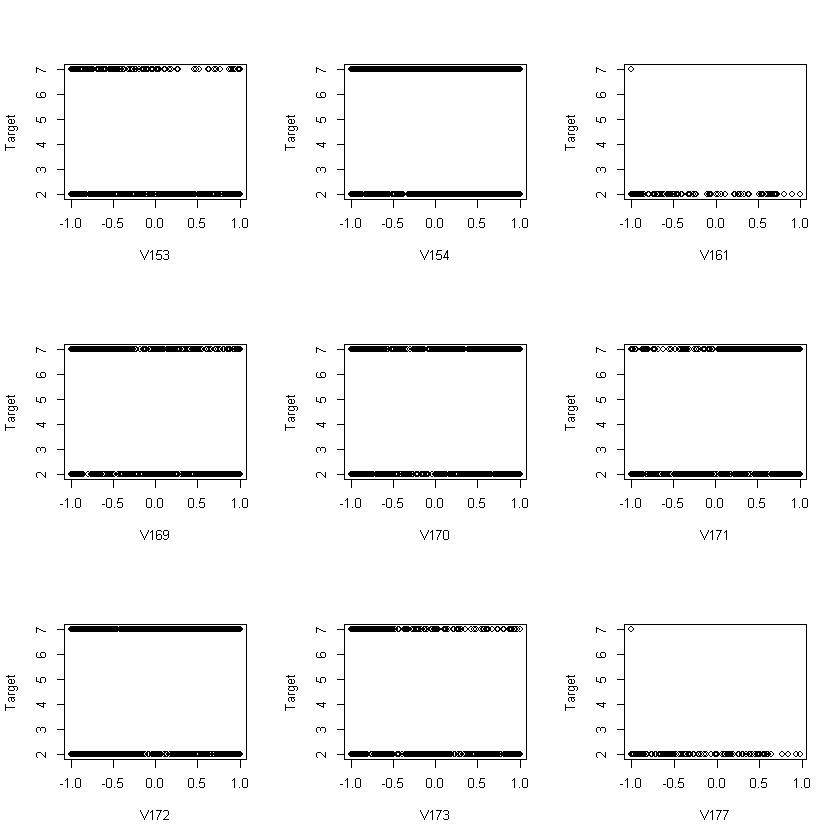

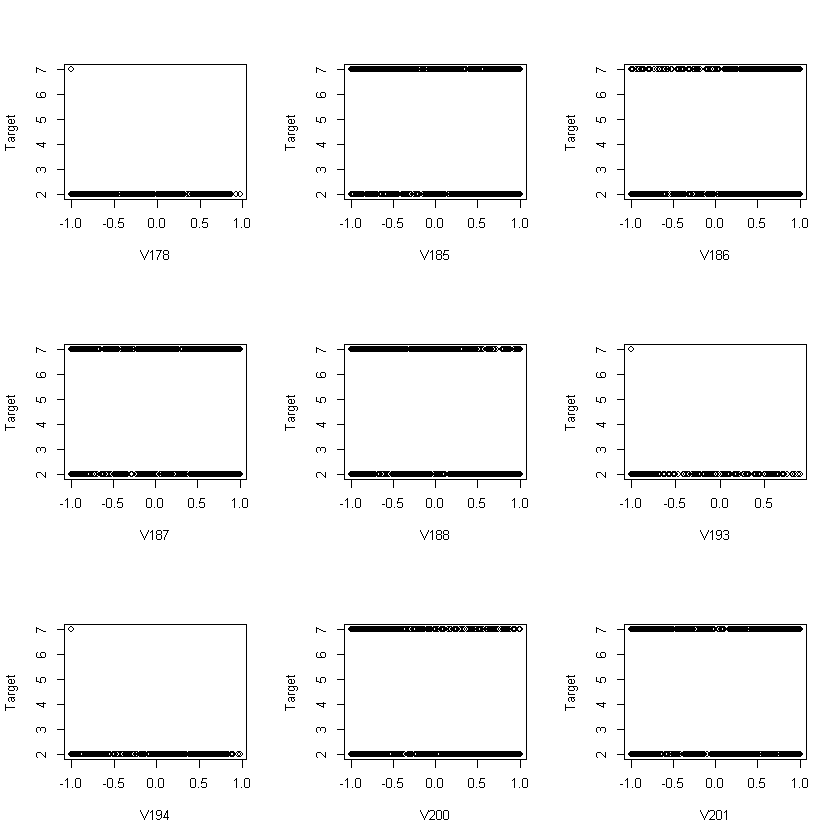

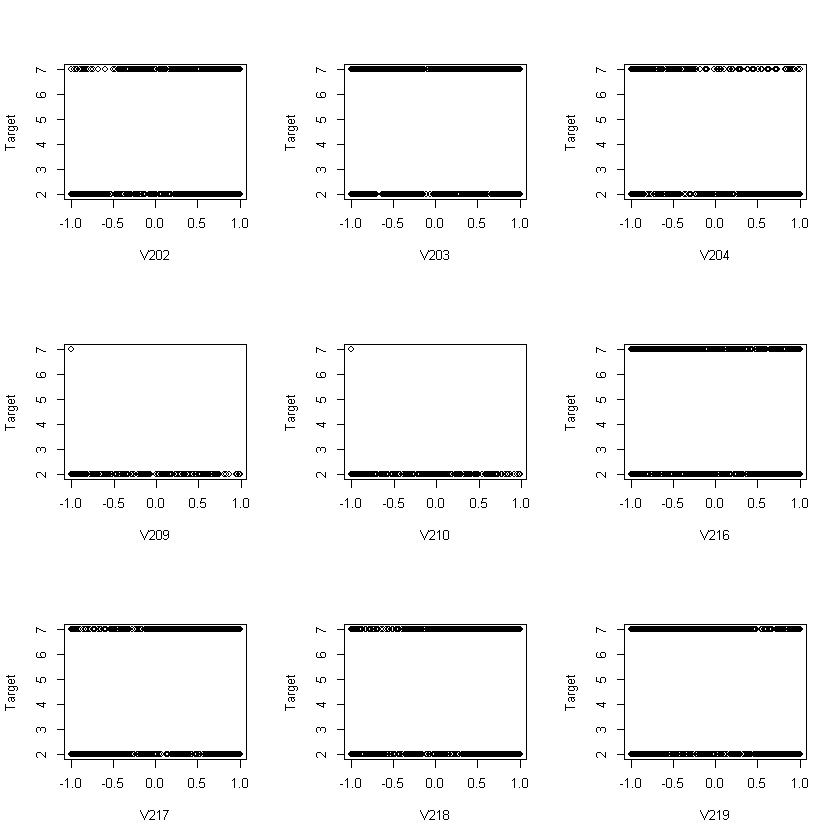

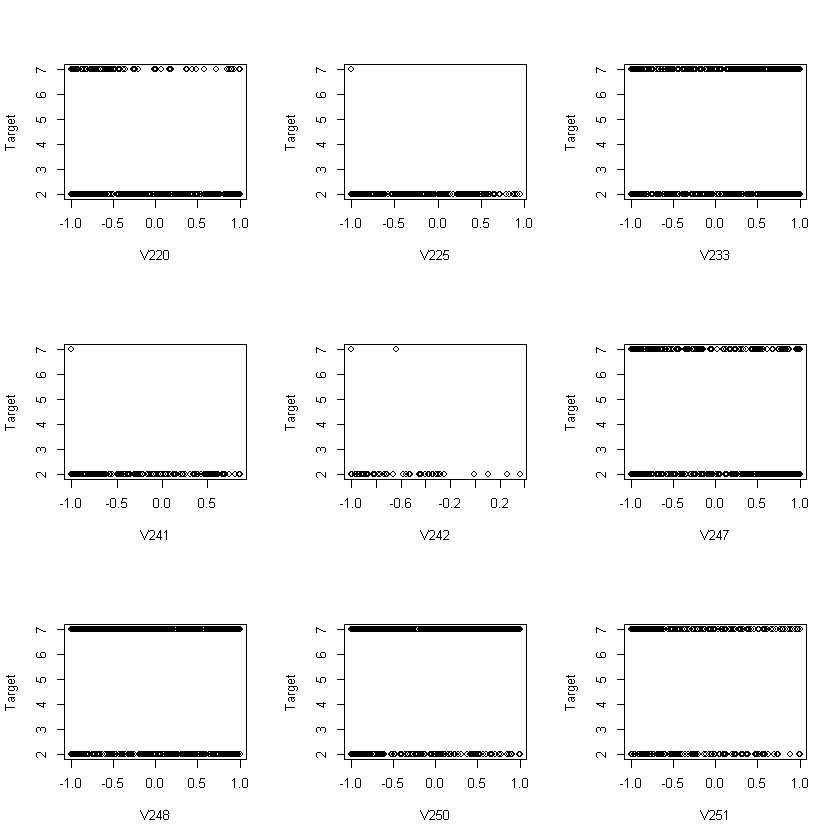

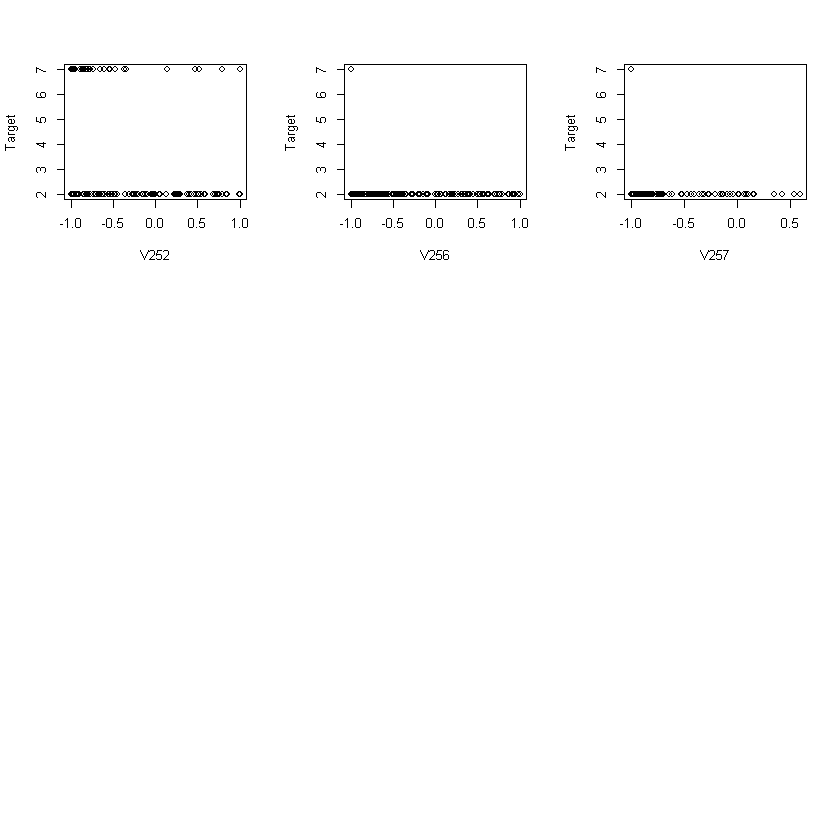

In [11]:
par(mfrow=c(3,3))
for (i in 2:76) {
  plot( x = reduced_Data[,i], y = reduced_Data[,1],
        ylab = "Target", xlab = colnames(reduced_Data)[i])
}

## Clasification algorithms

### Simple Linear Regression with binomial-transformation function

In [12]:
mod1 <- lm( V1 ~ . , data= reduced_Data);
mod1.summary <- summary(mod1)
print(mod1.summary)


pred1.train <- predict.lm(mod1, reduced_Data[,-1]);
y1pred.train <- 2 + 5*(pred1.train >= 4.5);
## Note that we predict Y1 to $2$ and $7$,
## depending on the indicator variable whether pred1.train >= 4.5 = (2+7)/2.

table(y1pred.train,reduced_Data[,1])
mean( y1pred.train != reduced_Data[,1]);



Call:
lm(formula = V1 ~ ., data = reduced_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2630 -0.6255  0.0192  0.5713  4.7440 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.2927439  0.7020291  -0.417 0.676750    
V2           0.4761678  0.3508006   1.357 0.174898    
V7           0.0215501  0.0562089   0.383 0.701491    
V15          0.5411097  0.0831579   6.507 1.09e-10 ***
V17          0.2052894  0.3577469   0.574 0.566175    
V18          0.1671352  0.2264058   0.738 0.460520    
V34          0.0613457  0.1834801   0.334 0.738173    
V38         -0.1066361  0.0506736  -2.104 0.035537 *  
V40          0.1650607  0.0504981   3.269 0.001109 ** 
V44          0.1691267  0.0564562   2.996 0.002790 ** 
V50         -0.0212192  0.1759832  -0.121 0.904046    
V54          0.0008171  0.0551973   0.015 0.988192    
V59          0.1457010  0.0541065   2.693 0.007175 ** 
V60         -0.0517603  0.0678145  -0.763 0.445445    
V61          0.38

            
y1pred.train   2   7
           2 724  20
           7   7 625

[1] 0.01962209

### Logistic Regression

In [13]:
library(caret)
set.seed(123)
# Prepare data for logistic regression by converting V1 to factor
glm_data = data.frame(reduced_Data)
glm_data$V1 = as.factor(glm_data$V1)
# Train the model
gml.model <- glm(V1 ~., data = glm_data, family=binomial())
summary(gml.model)

## Traning Error
glm.probs <- predict(gml.model,type = "response")
glm.pred <- ifelse(glm.probs > 0.5, 7, 2)
table(glm.pred,glm_data$V1)
mean( glm.pred != reduced_Data[,1]);

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = V1 ~ ., family = binomial(), data = glm_data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49    0.00    0.00    0.00    8.49  

Coefficients:
              Estimate Std. Error    z value Pr(>|z|)    
(Intercept) -8.971e+15  4.552e+07 -197085540   <2e-16 ***
V2           6.933e+13  2.274e+07    3048179   <2e-16 ***
V7           2.393e+13  3.644e+06    6565860   <2e-16 ***
V15          1.278e+15  5.392e+06  236981076   <2e-16 ***
V17         -1.507e+15  2.320e+07  -64972221   <2e-16 ***
V18         -5.285e+14  1.468e+07  -36005513   <2e-16 ***
V34          1.400e+14  1.190e+07   11764817   <2e-16 ***
V38         -2.355e+14  3.285e+06  -71688508   <2e-16 ***
V40          5.619e+13  3.274e+06   17162080   <2e-16 ***
V44          2.461e+14  3.660e+06   67232600   <2e-16 ***
V50          8.768e+14  1.141e+07   76843357   <2e-16 ***
V54         -8.682e+13  3.579e+06  -24260855   <2e-16 ***
V59          1.113e+14  3.508e+06   31723139   <2e-16 ***
V6

        
glm.pred   2   7
       2 720   9
       7  11 636

[1] 0.01453488

### k-nearest neighbors(k-NN)

In [14]:
library(class)
# Train the model
kvals= c(1,3,5,7,9,11,13,15)
KNN_Traning = data.frame(k=kvals, Traning_Error = rep(0, 8))
j = 1
for (i in kvals) {
  pr <- knn(glm_data[,-1],glm_data[,-1],cl=glm_data[,1], k=i)
  KNN_Traning[j,2] = mean( pr != glm_data[,1])
  j = j+1
}
KNN_Traning

k,Traning_Error
<dbl>,<dbl>
1,0.000000000
3,0.009447674
5,0.013808140
7,0.015261628
9,0.018168605
11,0.020348837
13,0.021802326
15,0.022529070


### Derive the testing errors

In [15]:
## Prepare the test dataset
## Remove highly correlated features
reduced_test = ziptest27[,-c(hc+1)]

In [16]:
## Linear Regression
cat("\n\nLinear Regression:\n")
pred1.test <- predict.lm(mod1, reduced_test[,-1]);
y1pred.test <- 2 + 5*(pred1.test >= 4.5);
table(y1pred.test,reduced_test[,1])
mean( y1pred.test != reduced_test[,1]);



Linear Regression:


           
y1pred.test   2   7
          2 194  11
          7   4 136

[1] 0.04347826

In [17]:
## Logistic Regression
cat("\n\nLogistic Regression:\n")
glm.test.probs <- predict(gml.model,newdata = reduced_test,type = "response")
glm.test.out <- ifelse(glm.test.probs > 0.5, 7, 2)
table(glm.test.out,reduced_test$V1)
mean( glm.test.out != reduced_test[,1]);



Logistic Regression:


            
glm.test.out   2   7
           2 189   9
           7   9 138

[1] 0.05217391

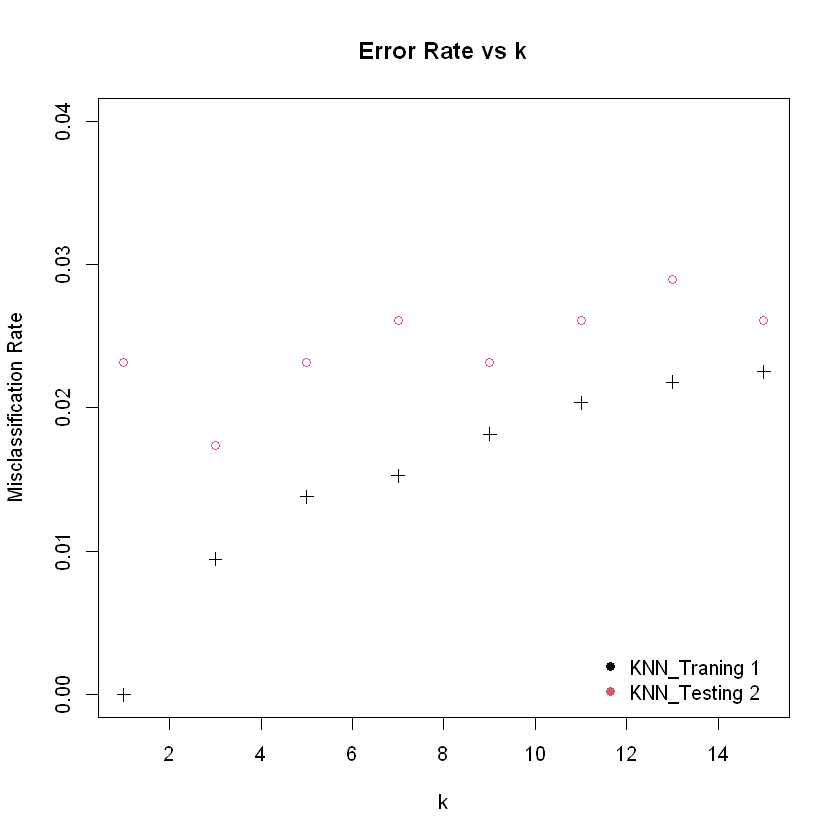

In [18]:
## KNN
kvals= c(1,3,5,7,9,11,13,15)
KNN_Testing = data.frame(k=kvals, Testing_Error = rep(0, 8))
j = 1
for (i in kvals) {
  pr <- knn(glm_data[,-1],reduced_test[,-1],cl=glm_data[,1], k=i)
  KNN_Testing[j,2] = mean( pr != reduced_test[,1])
  j = j+1
}
plot(KNN_Traning, col = 1, pch = 3,ylim=c(0,0.04), ylab="Misclassification Rate",
     main = "Error Rate vs k") 
points(KNN_Testing, col =2, pch = 1)
legend("bottomright", legend = paste(c("KNN_Traning", "KNN_Testing"), 1:2), col = 1:2, pch = 19, bty = "n")

### Cross-Validation

In [28]:
options(warn=-1)
set.seed(12)

# k in k-fold cross validation
kcv = 5 

# define a function to split the data
cv.folds <- function(n, nfolds){
  split(sample(n), rep(1:nfolds, length = n) )
}

# Split the data.train into 'kcv' groups
cv.folds.index <- cv.folds(nrow(reduced_Data), kcv)


TEALL <- matrix(0,nrow= 10, ncol = kcv)

for (i in 1:kcv) { # For each k-fold group:

  # a. Take one group as validation.data set
  validation.index <- unlist( cv.folds.index[i] )
  validation.data <- reduced_Data[validation.index,] 

  # b. Take the remaining groups as a train.data set
  train.data <- reduced_Data[-validation.index,]

  # c. Fit the model on the training set 

  ## Linear regression
  mod1 <- lm( V1 ~ . , data= train.data)
  
  ## Logistic regression
  glm_data = data.frame(train.data)
  glm_data$V1 = as.factor(glm_data$V1)
  gml.model <- glm(V1 ~., data = glm_data, family=binomial())
  
  ## KNN
  # No pre-training required


  
  # d. Evaluate the model on the validation set
  
  ## Linear regression
  pred1.validation <- predict.lm(mod1, validation.data[,-1]);
  y1pred.validation <- 2 + 5*(pred1.validation >= 4.5);
  TEALL[1, i] = mean( y1pred.validation != validation.data[,1]);

  ## Logistic regression
  glm.validation.probs <- predict(gml.model, newdata=validation.data, type = "response")
  glm.validation.out <- ifelse(glm.validation.probs > 0.5, 7, 2)
  TEALL[2, i] = mean( glm.validation.out != validation.data[,1]);

  ## KNN
  kvals= c(1,3,5,7,9,11,13,15)
  KNN_Traning = rep(0, 8)
  for (j in 1:8) {
    pr <- knn(glm_data[,-1],validation.data[,-1], cl=glm_data[,1], k=kvals[j])
    KNN_Traning[j] = mean( pr != validation.data[,1])
  }
  TEALL[3:10, i] = KNN_Traning
}

out = data.frame(Method = c("LinReg", "LogRegr", kvals), CV.Error = TEALL, 
                 mean = apply(TEALL,1,mean), 
                 sd = apply(TEALL,1,sd))

out

Method,CV.Error.1,CV.Error.2,CV.Error.3,CV.Error.4,CV.Error.5,mean,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LinReg,0.03985507,0.02909091,0.04727273,0.007272727,0.01818182,0.02833465,0.016113871
LogRegr,0.05797101,0.04363636,0.05454545,0.029090909,0.04000000,0.04504875,0.011611521
1,0.02536232,0.02545455,0.01454545,0.025454545,0.01454545,0.02107246,0.005958436
3,0.02898551,0.02909091,0.01818182,0.036363636,0.01454545,0.02543347,0.008896596
5,0.02536232,0.02181818,0.01454545,0.025454545,0.01454545,0.02034519,0.005493648
7,0.03260870,0.02181818,0.01818182,0.029090909,0.01818182,0.02397628,0.006566715
9,0.03623188,0.02909091,0.01454545,0.032727273,0.01818182,0.02615547,0.009376981
11,0.03985507,0.02909091,0.01090909,0.032727273,0.01818182,0.02615283,0.011570606
13,0.04347826,0.02909091,0.01454545,0.036363636,0.01818182,0.02833202,0.012120101


Best model is KNN with K=5

## Report performance on test dataset

In [20]:
kvals= c(1,3,5,7,9,11,13,15)
pr <- knn(glm_data[,-1],reduced_test[,-1],cl=glm_data[,1], k=5)
mean( pr != reduced_test[,1])

[1] 0.02028986